In [1]:
#this code runs on google colab for finding quantile
#L=['CBO','DEPTH','LCOM','NOC','DOC','RFC','WMC','sumLOC_TOTAL','NUMDEFECTS']
#for feature in L:
 #   first_quantile = np.quantile( df[feature],0.25)
  #  second_quantile = np.quantile( df[feature],0.5)
   # third_quantile = np.quantile( df[feature],0.75)
    #print("First quantile for", feature,"is",first_quantile)
    #print("Second quantile for", feature,"is",second_quantile)
    #print("Third quantile for", feature,"is",third_quantile)
    #print("\n")

In [7]:
from scipy.io import arff
import pandas as pd
import numpy as np
import csv
import urllib.request
import io # for io.StringIO(

#url = "http://promise.site.uottawa.ca/SERepository/datasets/kc1-class-level-numericdefect.arff"



data = arff.loadarff(r"C:\Users\Ashish\Downloads\ESE Lab sem 8\kc1-class-level-numericdefect.arff")

col_names=['CBO','DEPTH','LCOM','NOC','DOC','RFC','WMC','sumLOC_TOTAL','NUMDEFECTS']
df.rename(columns = {'COUPLING_BETWEEN_OBJECTS':'CBO'}, inplace = True)
df.rename(columns = {'LACK_OF_COHESION_OF_METHODS':'LCOM'}, inplace = True)
df.rename(columns = {'NUM_OF_CHILDREN':'NOC'}, inplace = True)
df.rename(columns = {'DEP_ON_CHILD':'DOC'}, inplace = True)
df.rename(columns = {'RESPONSE_FOR_CLASS':'RFC'}, inplace = True)
df.rename(columns = {'WEIGHTED_METHODS_PER_CLASS':'WMC'}, inplace = True)


In [9]:
df = pd.DataFrame(data[0])
df.head()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0.0,0.0,24.0,4.0,100.0,0.0,0.0,2.0,110.0,73.0,...,7376.0,8.39,50969.11,38600.75,2575.0,4801.0,1066.0,832.0,2828.0,23.0
1,0.0,0.0,19.0,4.0,100.0,0.0,0.0,3.0,78.0,30.0,...,3350.0,4.40,22480.91,18081.27,1168.0,2182.0,483.0,336.0,1221.0,16.0
2,100.0,0.0,13.0,1.0,88.0,0.0,0.0,0.0,99.0,99.0,...,3377.0,32.51,7318.61,15736.22,1278.0,2099.0,813.0,608.0,1522.0,3.0
3,0.0,0.0,21.0,4.0,100.0,0.0,0.0,2.0,68.0,30.0,...,3745.0,3.95,22958.05,20114.74,1393.0,2352.0,551.0,333.0,1408.0,19.0
4,5.0,0.0,17.0,2.0,90.0,0.0,0.0,1.0,69.0,36.0,...,1412.0,15.06,5723.73,7030.53,509.0,903.0,290.0,229.0,504.0,6.0


In [45]:
feature_cols = ['COUPLING_BETWEEN_OBJECTS', 'DEPTH', 'LACK_OF_COHESION_OF_METHODS', 'NUM_OF_CHILDREN','DEP_ON_CHILD']

X = df[feature_cols]

y = df.loc[:,'PERCENT_PUB_DATA']

In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred_class = logreg.predict(X_test)

In [50]:
from sklearn import metrics
print("Classification Accuracy is",metrics.accuracy_score(y_test, y_pred_class))

Classification Accuracy is 0.7297297297297297


In [51]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0.0      28
100.0     6
95.0      1
11.0      1
50.0      1
Name: PERCENT_PUB_DATA, dtype: int64

In [52]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

20.43243243243243

In [53]:
# calculate the percentage of zeros
1 - y_test.mean()

-19.43243243243243

In [54]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

20.43243243243243

In [55]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0.0    0.756757
Name: PERCENT_PUB_DATA, dtype: float64

In [56]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
  50.   0.   0.   0.   0.   0. 100. 100.   0.   0.  11.]
False: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [57]:
#CONFUSION MATRIX

In [58]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[27  0  1  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 6  0  0  0  0  0]]


In [59]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
  50.   0.   0.   0.   0.   0. 100. 100.   0.   0.  11.]
Pred [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [60]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[27  0  1  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 6  0  0  0  0  0]]


In [61]:

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9642857142857143
0.7297297297297297


In [62]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.03571428571428571
0.2702702702702703


In [64]:
specificity = TN / (TN + FP)

print(specificity)

1.0


In [67]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.0
0.0


In [68]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

nan


C:\Users\Ashish\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [69]:
logreg.predict(X_test)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
logreg.predict_proba(X_test)[0:10]

array([[8.46627861e-01, 1.27295211e-02, 8.67607322e-06, 8.06023499e-03,
        6.31538316e-03, 2.72812890e-03, 6.28546365e-03, 1.59395966e-02,
        2.30588649e-02, 1.26633799e-02, 6.55828903e-02],
       [7.29961779e-01, 4.11365331e-02, 5.17944719e-06, 4.89276827e-03,
        1.37837345e-02, 5.50046872e-03, 1.37314169e-02, 2.63033872e-02,
        3.52099338e-02, 1.93129091e-02, 1.10161890e-01],
       [5.97560002e-01, 1.52262111e-02, 5.51066476e-03, 2.65735769e-02,
        2.50317457e-02, 4.52318257e-03, 2.46519579e-02, 4.65260574e-02,
        2.27698631e-02, 4.59667069e-02, 1.85660031e-01],
       [8.39539292e-01, 1.28112888e-02, 3.38350490e-05, 1.20010178e-02,
        7.74610716e-03, 3.68146918e-03, 7.71820015e-03, 1.80585071e-02,
        2.41141717e-02, 1.51582940e-02, 5.91378168e-02],
       [7.72568437e-01, 1.68983943e-03, 3.13433010e-02, 8.77700942e-02,
        6.16246208e-03, 1.94177357e-03, 6.08874557e-03, 1.73032182e-02,
        1.08477264e-02, 2.06955701e-02, 4.35888324e-

In [71]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.01272952, 0.04113653, 0.01522621, 0.01281129, 0.00168984,
       0.02557141, 0.00047104, 0.01069021, 0.01943837, 0.04505514])

In [72]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [73]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

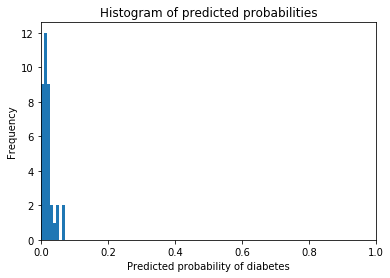

In [74]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [78]:
#Completeness Score
from sklearn.metrics.cluster import completeness_score
print(1-completeness_score(y_test,y_pred_class))


0.9384092289227242
